In [1]:
import pandas as pd
import numpy as np
import scipy.cluster as cluster
import scipy.spatial.distance as ssd
import time
from matplotlib import pyplot as plt

In [2]:
path = "E:/CS_Master_Degree_UIUC/CS410_Text_Information_system/Project/Project Submission/CourseProject/Dataset/"
titleFPs = pd.read_csv(path + "titlesFP2000_with_index.csv")

In [3]:
titleFPs.sort_values('Freq', ascending = False)

,title_pattern,Freq,transaction_index
449,system,372,"[13, 30, 46, 48, 55, 70, 79, 87, 88, 99, 100, ..."
284,use,354,"[8, 9, 41, 53, 79, 83, 86, 89, 92, 95, 101, 11..."
675,model,298,"[8, 52, 64, 111, 151, 153, 159, 177, 183, 185,..."
676,network,208,"[85, 118, 175, 180, 200, 243, 250, 252, 266, 2..."
1053,algorithm,190,"[3, 14, 32, 38, 75, 80, 88, 98, 155, 167, 170,..."
...,...,...,...
1451,video segment,4,"[1001, 1200, 1938, 1976, 1979]"
1452,video sequenc,4,"[1032, 1083, 1113, 3088, 3766]"
805,way,4,"[68, 697, 763, 2208, 2222, 2360, 2479, 2964, 3..."
1456,activ system,4,"[350, 571, 915, 1209, 1223, 1935, 1988, 2347, ..."


In [4]:
# Define the Jaccard_Dist per paper
def Jaccard_Dist(p1_indice, p2_indice):
    '''
    Given transaction indice list of two patterns, p1_indice and p2_indice,
    Output the Jaccard distance defined as 1- intersection(p1_indice, p2_indice)/union(p1_indice, p2_indice)
    '''
    return 1-len(set(p1_indice).intersection(p2_indice))/len(set(p1_indice).union(p2_indice))

In [5]:
# Example of Jaccard distance betwen two title FPs
p1 = titleFPs.iloc[0]['transaction_index']
p2 = titleFPs.iloc[1]['transaction_index']
Jaccard_Dist(p1, p2)

0.1428571428571429

In [6]:
# Jaccard Distance matrix between pariwise title FPs
np.set_printoptions(formatter={'float': lambda x: "{0:0.8f}".format(x)})
num_ind =  len(titleFPs)
c = 0
# J_dist is a symetric num_ind x num_ind matrix 
# and the diagnal of the matrix is the distance between the title pattern and itself,
# therefore the diagnal of the matrix should be all 0. 
J_dist = np.zeros([num_ind,num_ind]) 
start =  time.time()
while c < num_ind:
    
    p = titleFPs['transaction_index'].iloc[c]
    # Fill the upper and lower triangle of the matrix 
    J_dist[c+1:, c] = titleFPs['transaction_index'].iloc[c+1:].apply(lambda x: Jaccard_Dist(p, x))
    J_dist[c, c+1:] = titleFPs['transaction_index'].iloc[c+1:].apply(lambda x: Jaccard_Dist(p, x))
    c +=1
    
end = time.time()
print((end - start)/60)

0.6302013158798218


In [7]:
J_dist.mean()

0.11282628165369404

In [10]:
# Get 1D condensed array of J_dist
J_distArray = ssd.squareform(J_dist)
# Perform clustering using complete linkage
Z = cluster.hierarchy.complete(J_distArray)

In [11]:
# Check the first 20 iteratives of the clustering 
Z[:20]

array([[0.00000000, 2.00000000, 0.00000000, 2.00000000],
       [1.00000000, 33.00000000, 0.00000000, 2.00000000],
       [3.00000000, 1912.00000000, 0.00000000, 3.00000000],
       [4.00000000, 1914.00000000, 0.00000000, 4.00000000],
       [5.00000000, 1915.00000000, 0.00000000, 5.00000000],
       [6.00000000, 1916.00000000, 0.00000000, 6.00000000],
       [7.00000000, 1917.00000000, 0.00000000, 7.00000000],
       [9.00000000, 1918.00000000, 0.00000000, 8.00000000],
       [8.00000000, 67.00000000, 0.00000000, 2.00000000],
       [10.00000000, 1919.00000000, 0.00000000, 9.00000000],
       [13.00000000, 1921.00000000, 0.00000000, 10.00000000],
       [11.00000000, 172.00000000, 0.00000000, 2.00000000],
       [12.00000000, 1817.00000000, 0.00000000, 2.00000000],
       [14.00000000, 1922.00000000, 0.00000000, 11.00000000],
       [15.00000000, 1925.00000000, 0.00000000, 12.00000000],
       [18.00000000, 1926.00000000, 0.00000000, 13.00000000],
       [16.00000000, 74.00000000, 0.0

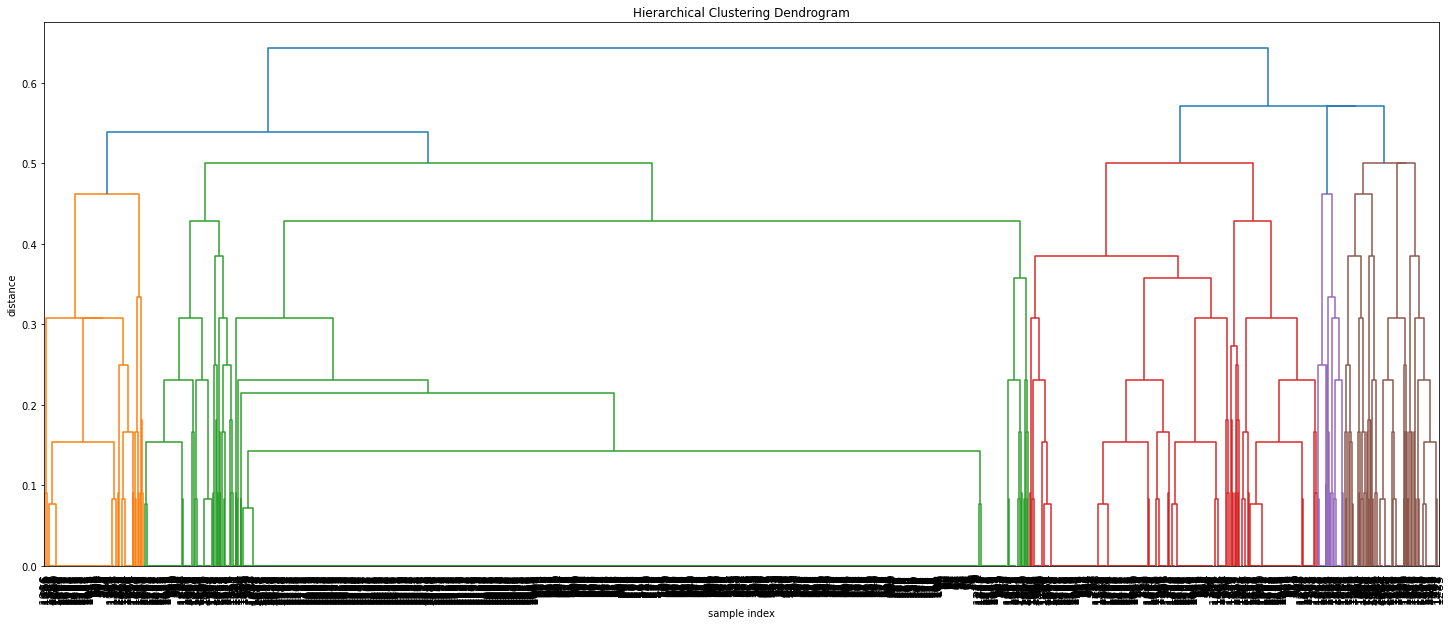

In [12]:
# Display full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
cluster.hierarchy.dendrogram(
    Z,
    show_leaf_counts=True,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    color_threshold = 0.8*max(Z[:,2]),
)
plt.show()

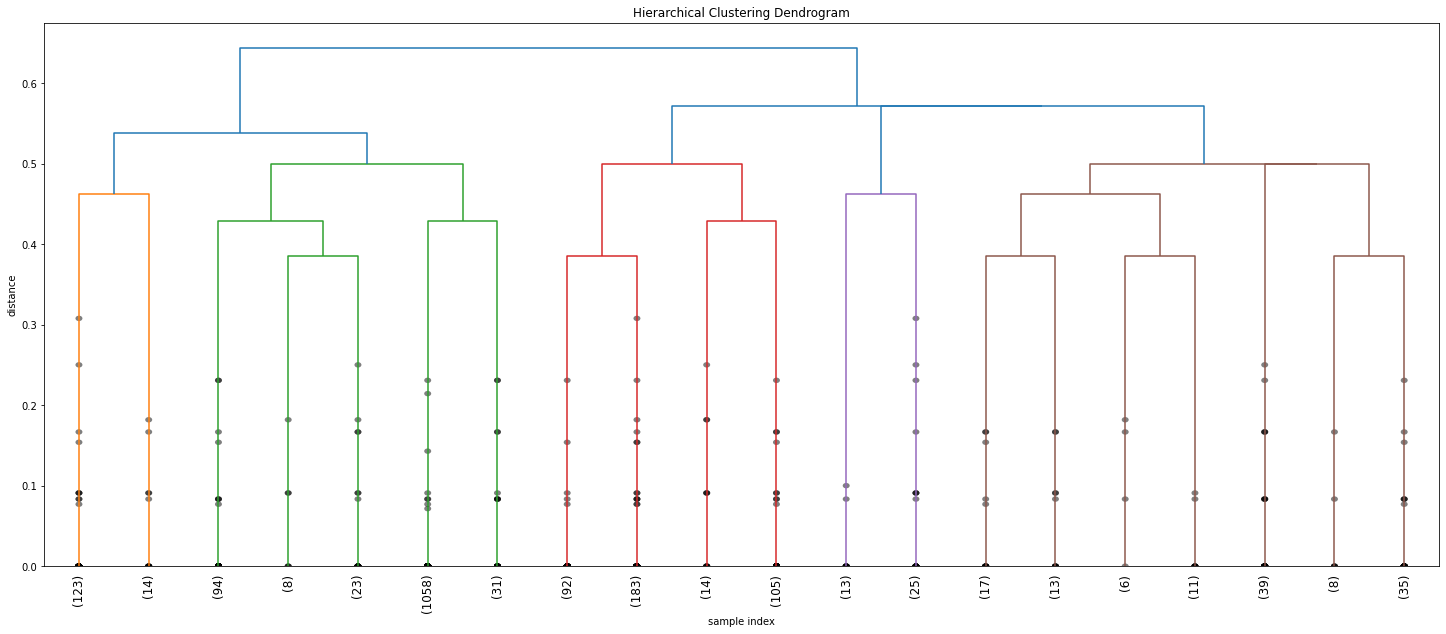

In [13]:
# Display only the top branches 
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
cluster.hierarchy.dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=20,  # show only the last p merged clusters
    show_leaf_counts=True,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    color_threshold = 0.8*max(Z[:,2]),
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

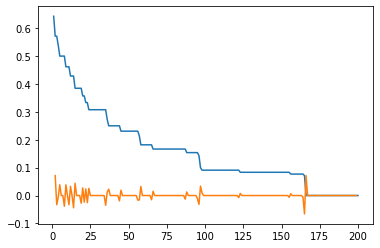

2


In [14]:
last = Z[-200:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2 
print(k)

In [15]:
# Get clusters
max_d = 0.01
clusters = cluster.hierarchy.fcluster(Z, max_d, criterion='distance')
print("Number of Clusters: ", len(set(clusters)))

# Add cluster labels to the title patterns dataset titles_FPs
titleFPs['cluster_index'] = clusters
titleFPs

Number of Clusters:  166


,title_pattern,Freq,transaction_index,cluster_index
0,home,5,"[1977, 2509, 2601, 2602, 3078, 3126, 3854]",51
1,perceptu,4,"[1044, 1450, 1579, 3112]",146
2,net,22,"[45, 60, 85, 109, 118, 172, 174, 175, 178, 180...",51
3,grid,12,"[364, 365, 375, 517, 952, 953, 1359, 1363, 212...",51
4,delay,11,"[727, 1246, 2339, 2624, 2778, 3025, 3608, 3671...",51
...,...,...,...,...
1907,learn system,9,"[70, 87, 88, 1525, 1794, 1798, 1875, 2063, 206...",51
1908,learn model,4,"[995, 2063, 2266, 2868, 3147, 3345]",51
1909,learn algorithm,5,"[88, 1442, 1824, 2077, 2700, 3883]",97
1910,learn function,4,"[1093, 3349, 3352, 3645]",22


In [16]:
# Group the titles_FPs by cluster index and pick the 'centroid' pattern with the maximum support
titleFPs_centroid = titleFPs.groupby("cluster_index")['title_pattern'].max('Freq')
titleFPs_centroid

cluster_index
1         planar graph
2        review system
3      workflow system
4             web base
5           tool learn
            ...       
162            possibl
163        valid model
164             window
165              uniqu
166       java virtual
Name: title_pattern, Length: 166, dtype: object

In [17]:
titlesFP2000_final = titleFPs.loc[titleFPs['title_pattern'].isin(titleFPs_centroid)].sort_values(by= 'Freq', ascending = False)

In [18]:
titlesFP2000_final.head()

,title_pattern,Freq,transaction_index,cluster_index
683,xml,15,"[166, 662, 1305, 1446, 1534, 1545, 1634, 2088,...",51
1839,extend abstract,10,"[57, 919, 950, 1507, 1558, 1587, 1590, 2058, 2...",130
989,workshop,9,"[1302, 2066, 2806, 3099, 3748, 3749, 3922, 392...",100
1000,name,9,"[159, 306, 496, 519, 1317, 1464, 1776, 3675, 4...",20
514,weight,9,"[503, 1619, 2019, 2325, 2627, 2717, 2761, 2970...",81


In [ ]:
output_path = path
titlesFP2000_final.to_csv(output_path + "titlesFP2000_final.csv", index = False)

In [ ]:
# dist_clusters = Z[:,2]
# idxs = np.arange(1, len(dist_clusters) + 1)
# plt.plot(idxs, dist_clusters, 'b')
# acceleration = np.diff(dist_clusters, 2)  # 2nd derivative of the distances
# plt.plot(idxs[:-2] + 1, acceleration, 'r')
# plt.show()
# k = acceleration.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
# print("clusters:", k)